In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class Grid():
    def __init__(self, height, width, num_hiders):
        grid = np.zeros((height,width))
        loc = []
        for i in range(num_hiders):
            x = np.random.randint(width)
            y = np.random.randint(height)
            if grid[x][y] < 1:
                grid[x][y]=1
                loc.append((x,y))
            else:
                x = np.random.randint(width)
                y = np.random.randint(height)
                while grid[x][y] > 0:
                    x = np.random.randint(width)
                    y = np.random.randint(height)
                grid[x][y]=1
                loc.append((x,y))
                
        x = np.random.randint(width)
        y = np.random.randint(height)
        while grid[x][y] > 0:
            x = np.random.randint(width)
            y = np.random.randint(height)
        grid[x][y]= - 1
                
        self.grid = grid
        self.grid_h = height
        self.grid_w = width
        self.num_hiders = num_hiders
        self.hiders_loc = loc
        self.search_loc = (x,y)
        
    
    def caught(self, x, y):
        if self.grid[x][y] > 0:
            return True
        else:
            return False
          
    def remove_hider(self, x, y):
        if self.caught(x,y):
            self.grid[x][y] = 0
            self.hiders_loc.remove((x,y))
            self.num_hiders -= 1
        else:
            print("No hider located in (",x,",",y,")")
        
    def randomize_hiders(self):
        loc = []
        self.grid = np.zeros((self.grid_h, self.grid_w))
        for i in range(self.num_hiders):
            x = np.random.randint(self.grid_w)
            y = np.random.randint(self.grid_h)
            if self.grid[x][y] < 1:
                self.grid[x][y]=1
                loc.append((x,y))
            else:
                x = np.random.randint(self.grid_w)
                y = np.random.randint(self.grid_h)
                while self.grid[x][y] > 0:
                    x = np.random.randint(self.grid_w)
                    y = np.random.randint(self.grid_h)
                self.grid[x][y]=1
                loc.append((x,y))
        self.hiders_loc = loc
        return self.hiders_loc
    
    def print_grid(self):
        return self.grid

In [65]:
grid1 = Grid(10,10,7)

In [66]:
grid1.hiders_loc

[(4, 9), (8, 2), (9, 7), (7, 1), (2, 3), (1, 1), (9, 6)]

In [67]:
grid1.randomize_hiders()
grid1.hiders_loc

[(0, 2), (5, 4), (3, 6), (9, 8), (6, 9), (2, 8), (6, 5)]

In [10]:
grid1.caught(0,1)

True

In [11]:
grid1.print_grid()

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [12]:
grid1.remove_hider(0,9)

No hider located in ( 0 , 9 )


In [13]:
grid1.remove_hider(0,1)

In [14]:
print(np.sum(grid1.print_grid()))
grid1.print_grid()

6.0


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [15]:
grid1.hiders_loc

[(3, 8), (5, 6), (6, 4), (9, 4), (2, 8), (7, 1)]

In [20]:
def markov_chain(n):
    p = np.zeros((n**2,n**2))
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}
    #Corners
    p[b[0,0], b[0,1]] = 1/2
    p[b[0,0], b[1,0]] = 1/2

    p[b[n - 1,0], b[n - 1,1]] = 1/2
    p[b[n - 1,0], b[n - 2,0]] = 1/2

    p[b[0, n - 1], b[0, n - 2]] = 1/2
    p[b[0, n - 1], b[1, n - 1]] = 1/2

    p[b[n - 1, n - 1], b[n - 1, n - 2]] = 1/2
    p[b[n - 1, n - 1], b[n - 2, n - 1]] = 1/2

    #upper row
    for i in range(1, n - 1):
        p[b[0, i], b[0, i + 1]] = 1/3
        p[b[0, i], b[0, i - 1]] = 1/3
        p[b[0, i], b[1, i]] = 1/3

    #bottom row
    for i in range(1, n - 1):
        p[b[n - 1, i], b[n - 1, i + 1]] = 1/3
        p[b[n - 1, i], b[n - 1, i - 1]] = 1/3
        p[b[n - 1, i], b[n - 2, i]] = 1/3

    #left column
    for i in range(1, n - 1):
        p[b[i, 0], b[i + 1, 0]] = 1/3
        p[b[i, 0], b[i - 1, 0]] = 1/3
        p[b[i, 0], b[i, 1]] = 1/3

    #Right column
    for i in range(1, n - 1):
        p[b[i, n - 1], b[i + 1, n - 1]] = 1/3
        p[b[i, n - 1], b[i - 1, n - 1]] = 1/3
        p[b[i, n - 1], b[i, n - 2]] = 1/3

    #Center
    for i in range(1, n - 1):
        for j in range(1, n - 1):
            p[b[i, j], b[i, j - 1]] = 1/4
            p[b[i, j], b[i, j + 1]] = 1/4
            p[b[i, j], b[i - 1, j]] = 1/4
            p[b[i, j], b[i + 1, j]] = 1/4
    return p

# Immobile Hider, No escape

## Stochastic search

In [43]:
#Random Strategy with stochastic movement induced by Markov Chain, no scape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 1000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    p = markov_chain(n)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        a = grid1.print_grid()
        next_position = grid1.search_loc
        #print(a)
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            a[next_position[0],next_position[1]] = -1
            x0 = np.zeros((n**2))
            x0[b[next_position]] = 1
            next_position = states[np.random.choice(range(n**2), p = np.ndarray.flatten(np.matmul(x0, p)))]
            period += 1
            #print('\nPeriod', period)
            #print(a)
            #print(next_position)
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


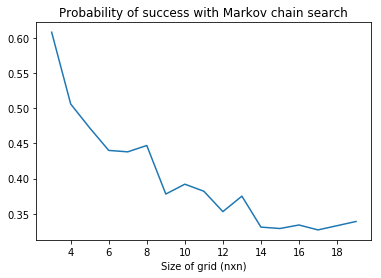

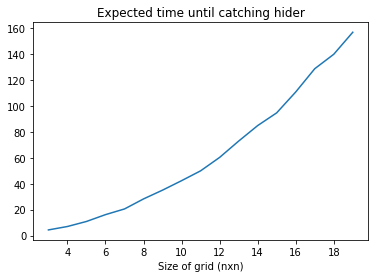

In [44]:
# Markov movement, 0% probability of ambush
# Hider is immobile, 0% probability of escape

data = {'Markov Chain':{
                        'time': time_av,
                        'success': success_av}
       }

plt.plot(range(3, 20), success_av)
plt.xlabel("Size of grid (nxn)")
plt.title("Probability of success with Markov chain search")
plt.show()

plt.plot(range(3, 20), time_av)
plt.xlabel("Size of grid (nxn)")
plt.title("Expected time until catching hider")
plt.show()

## Deterministic search

In [45]:
#Random Strategy with deterministic movement. Extensive search with no escape.
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
num_repetitions = 1000

for n in n_vec:
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    for i in range(num_repetitions):
        grid1 = Grid(n, n, 1)
        position = grid1.hiders_loc
        rows = position[0][0]
        columns = position[0][1]
        time[i] =  columns*n + rows*(columns%2 == 0) + (n - rows)*(columns%2 == 1)

    time_av[n - 3] = np.mean(time)

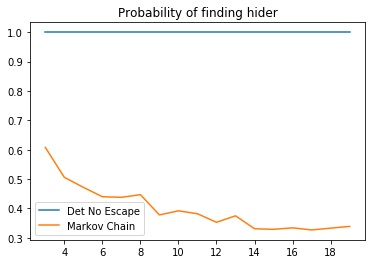

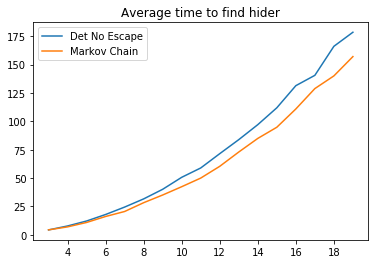

In [46]:
# Det_NoEscape = deterministic movement, 0% probability of ambush
# hider is immobile, 0% probability of escape

data['Det_NoEscape'] = {'time': time_av,
                        'success': [1]*len(time_av)}

plt.plot(range(3, 20), data['Det_NoEscape']['success'],label = 'Det No Escape')
plt.plot(range(3, 20), data['Markov Chain']['success'],label = 'Markov Chain')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

plt.plot(range(3, 20), data['Det_NoEscape']['time'],label = 'Det No Escape')
plt.plot(range(3, 20), data['Markov Chain']['time'],label = 'Markov Chain')
plt.title('Average time to find hider')
plt.legend()
plt.show()

## Random search

In [55]:
#Random Strategy with random movement, no escape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 5000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        a = grid1.print_grid()
        next_position = grid1.search_loc
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            a[next_position[0],next_position[1]] = -1
            next_position = [np.random.randint(n),np.random.randint(n)]
            period += 1
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [56]:
data['Random_revisit'] = {'time': time_av,
                        'success': success_av}

In [61]:
#Random Strategy with random movement, no escape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 5000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        a = grid1.print_grid()
        next_position = grid1.search_loc
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            a[next_position[0],next_position[1]] = -1
            next_position = [np.random.randint(n),np.random.randint(n)]
            while a[next_position[0],next_position[1]]==-1:
                next_position = [np.random.randint(n),np.random.randint(n)]
            period += 1
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


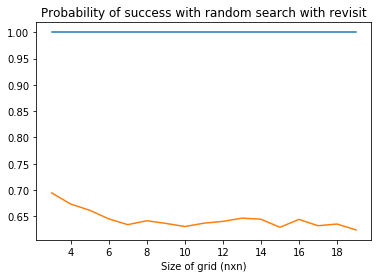

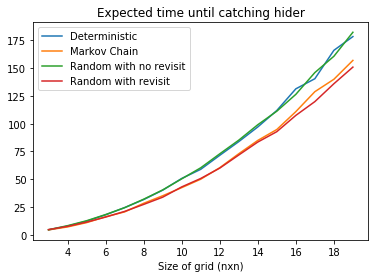

In [64]:
data['Random_norevisit'] = {'time': time_av,
                        'success': success_av}


plt.plot(range(3, 20), data['Random_norevisit']['success'])
plt.plot(range(3, 20), data['Random_revisit']['success'])
plt.xlabel("Size of grid (nxn)")
plt.title("Probability of success with random search with revisit")
plt.show()

plt.plot(range(3, 20), data['Det_NoEscape']['time'],label = 'Deterministic')
plt.plot(range(3, 20), data['Markov Chain']['time'],label = 'Markov Chain')
plt.plot(range(3, 20), data['Random_norevisit']['time'],label = 'Random with no revisit')
plt.plot(range(3, 20), data['Random_revisit']['time'],label = 'Random with revisit')


plt.xlabel("Size of grid (nxn)")
plt.title("Expected time until catching hider")
plt.legend()
plt.show()

# Mobile hider (p=1), No escape

## Stochastic search

In [79]:
#Random Strategy with stochastic movement induced by Markov Chain, no scape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 1000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    p = markov_chain(n)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        a = grid1.print_grid()
        next_position = grid1.search_loc
        #print(a)
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            grid1.randomize_hiders()
            x0 = np.zeros((n**2))
            x0[b[next_position]] = 1
            next_position = states[np.random.choice(range(n**2), p = np.ndarray.flatten(np.matmul(x0, p)))]
            period += 1
            #print('\nPeriod', period)
            #print(a)
            #print(next_position)
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions


data2 = {'Markov Chain':{
                        'time': time_av,
                        'success': success_av}
       }



3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


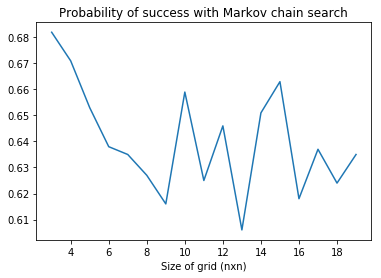

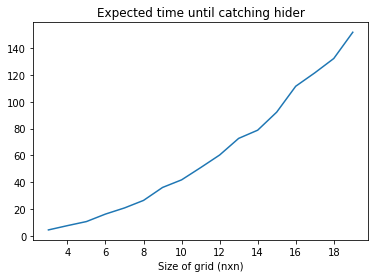

In [80]:
# Markov movement, 0% probability of ambush
# Hider is mobile, 0% probability of escape

plt.plot(range(3, 20), success_av)
plt.xlabel("Size of grid (nxn)")
plt.title("Probability of success with Markov chain search")
plt.show()

plt.plot(range(3, 20), time_av)
plt.xlabel("Size of grid (nxn)")
plt.title("Expected time until catching hider")
plt.show()

## Deterministic search

In [81]:
def det_getnextmove(n,x,y):
    if x==n-1 and y==n-1:
        return [0,0]
    elif y<n-1:
        return [x,y+1]
    else:
        return [x+1,0]

#Random Strategy with stochastic movement induced by Markov Chain, no scape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 1000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    p = markov_chain(n)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        next_position = grid1.search_loc
        #print(a)
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            grid1.randomize_hiders()
            next_position = det_getnextmove(n,next_position[0],next_position[1])
            period += 1
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions


data2['Deterministic'] = {'time': time_av,
                        'success': success_av}

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


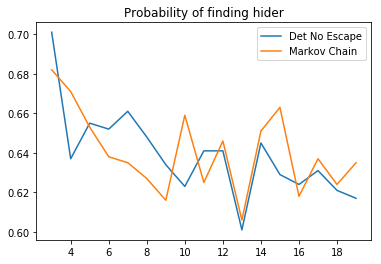

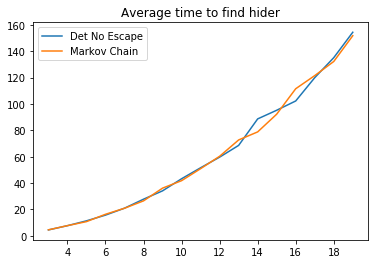

In [83]:
plt.plot(range(3, 20), data2['Deterministic']['success'],label = 'Det No Escape')
plt.plot(range(3, 20), data2['Markov Chain']['success'],label = 'Markov Chain')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

plt.plot(range(3, 20), data2['Deterministic']['time'],label = 'Det No Escape')
plt.plot(range(3, 20), data2['Markov Chain']['time'],label = 'Markov Chain')
plt.title('Average time to find hider')
plt.legend()
plt.show()

## Random search

In [84]:
#Random Strategy with random movement, no escape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 5000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        next_position = grid1.search_loc
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            grid1.randomize_hiders()
            next_position = [np.random.randint(n),np.random.randint(n)]
            period += 1
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions

data2['Random'] = {'time': time_av,
                        'success': success_av}

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


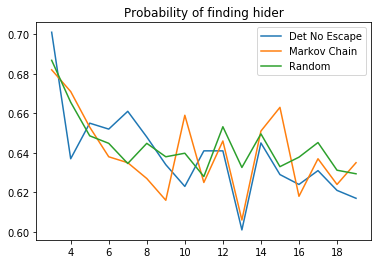

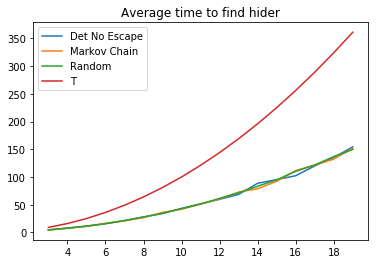

In [87]:
plt.plot(range(3, 20), data2['Deterministic']['success'],label = 'Det No Escape')
plt.plot(range(3, 20), data2['Markov Chain']['success'],label = 'Markov Chain')
plt.plot(range(3, 20), data2['Random']['success'],label = 'Random')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data2['Deterministic']['time'],label = 'Det No Escape')
plt.plot(range(3, 20), data2['Markov Chain']['time'],label = 'Markov Chain')
plt.plot(range(3, 20), data2['Random']['time'],label = 'Random')
plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

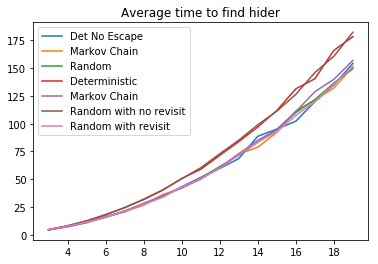

In [96]:
t = np.arange(3,20)**2
plt.plot(range(3, 20), data2['Deterministic']['time'],label = 'Det No Escape')
plt.plot(range(3, 20), data2['Markov Chain']['time'],label = 'Markov Chain')
plt.plot(range(3, 20), data2['Random']['time'],label = 'Random')
#plt.plot(range(3,20),t,label="T")

plt.plot(range(3, 20), data['Det_NoEscape']['time'],label = 'Deterministic')
plt.plot(range(3, 20), data['Markov Chain']['time'],label = 'Markov Chain')
plt.plot(range(3, 20), data['Random_norevisit']['time'],label = 'Random with no revisit')
plt.plot(range(3, 20), data['Random_revisit']['time'],label = 'Random with revisit')

plt.title('Average time to find hider')
plt.legend()
plt.show()

# Mobile hider (p=0.5), No escape

## Stochastic search

In [97]:
#Random Strategy with stochastic movement induced by Markov Chain, no scape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 1000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    p = markov_chain(n)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        a = grid1.print_grid()
        next_position = grid1.search_loc
        #print(a)
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            if np.random.rand()>0.5:
                grid1.randomize_hiders()
            x0 = np.zeros((n**2))
            x0[b[next_position]] = 1
            next_position = states[np.random.choice(range(n**2), p = np.ndarray.flatten(np.matmul(x0, p)))]
            period += 1
            #print('\nPeriod', period)
            #print(a)
            #print(next_position)
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions


data3 = {'Markov Chain':{
                        'time': time_av,
                        'success': success_av}
       }

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


## Deterministic search

In [98]:
#Random Strategy with stochastic movement induced by Markov Chain, no scape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 1000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    p = markov_chain(n)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        next_position = grid1.search_loc
        #print(a)
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            if np.random.rand()>0.5:
                grid1.randomize_hiders()
            next_position = det_getnextmove(n,next_position[0],next_position[1])
            period += 1
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions


data3['Deterministic'] = {'time': time_av,
                        'success': success_av}

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


## Random search

In [99]:
#Random Strategy with random movement, no escape
n_vec = list(range(3, 20))
time_av = np.empty(len(n_vec))
success_av = np.empty(len(n_vec))
num_repetitions = 5000

for n in n_vec:
    print(n)
    states = [(i,j) for i in range(n) for j in range(n)]
    b = {(i,j):n*i+j for i in range(n) for j in range(n)}

    time = np.empty(num_repetitions)
    success = np.empty(num_repetitions)
    T = n**2

    for i in range(num_repetitions):
        grid1 = Grid(n,n,1)
        next_position = grid1.search_loc
        period = 0
        while not grid1.caught(next_position[0],next_position[1]):
            if np.random.rand() > 0.5:
                grid1.randomize_hiders()
            next_position = [np.random.randint(n),np.random.randint(n)]
            period += 1
            if period > T:
                break
        time[i] = period
        success[i] = grid1.caught(next_position[0],next_position[1])
  
    time_success = [time[i] for i in range(num_repetitions) if success[i]]
    time_av[n - 3] = np.mean(time_success)
    success_av[n - 3] = np.sum(success)/num_repetitions

data3['Random'] = {'time': time_av,
                        'success': success_av}

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


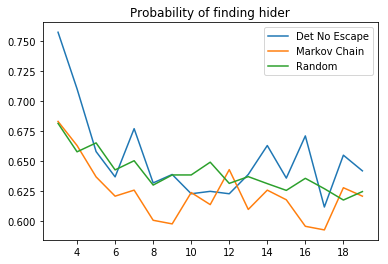

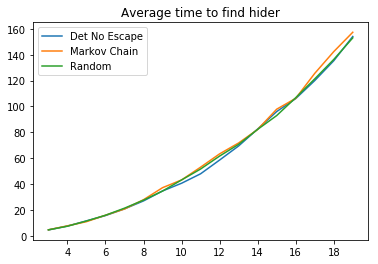

In [101]:
plt.plot(range(3, 20), data3['Deterministic']['success'],label = 'Det No Escape')
plt.plot(range(3, 20), data3['Markov Chain']['success'],label = 'Markov Chain')
plt.plot(range(3, 20), data3['Random']['success'],label = 'Random')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data3['Deterministic']['time'],label = 'Det No Escape')
plt.plot(range(3, 20), data3['Markov Chain']['time'],label = 'Markov Chain')
plt.plot(range(3, 20), data3['Random']['time'],label = 'Random')
#plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

# Immobile hider, Escape (p=1)

## Stochastic search

In [114]:
def stoc_ambush(prob_ambush, prob_escape, mobile, prob_hidermove):
    n_vec = list(range(3, 20))
    time_av = np.empty(len(n_vec))
    success_av = np.empty(len(n_vec))
    num_repetitions = 1000

    for n in n_vec:
        #print(n)
        states = [(i,j) for i in range(n) for j in range(n)]
        b = {(i,j):n*i+j for i in range(n) for j in range(n)}

        time = np.empty(num_repetitions)
        success = np.empty(num_repetitions)
        p = markov_chain(n)
        T = n**2

        for i in range(num_repetitions):
            grid1 = Grid(n,n,1)
            a = grid1.print_grid()
            next_position = grid1.search_loc
            period_escape=0
            if np.random.rand() < prob_escape:
                period_escape = np.random.randint(1, T)
            period = 0
            
            while not grid1.caught(next_position[0],next_position[1]):
                if mobile and np.random.rand()<prob_hidermove:
                    grid1.randomize_hiders()
                
                if np.random.rand() < prob_ambush:
                    period += 1
                    if period == period_escape:
                        success[i] = 1
                        break
                else:
                    x0 = np.zeros((n**2))
                    x0[b[next_position]] = 1
                    next_position = states[np.random.choice(range(n**2), p = np.ndarray.flatten(np.matmul(x0, p)))]
                    period += 1
                
                if period > T:
                    break
            time[i] = period
            success[i] = grid1.caught(next_position[0],next_position[1])

        time_success = [time[i] for i in range(num_repetitions) if success[i]]
        time_av[n - 3] = np.mean(time_success)
        success_av[n - 3] = np.sum(success)/num_repetitions
        
    return time_av, success_av

In [115]:
time,success=stoc_ambush(0, 1, False, 0)
data4 = {'Markov Chain_0':{'time': time_av,
                        'success': success_av}}

data4

{'Markov Chain_0': {'time': array([  4.50865864,   7.33201581,  11.3346362 ,  15.80304916,
          21.2804428 ,  27.50174548,  34.5167554 ,  43.10585656,
          51.56284658,  61.58328056,  70.65850596,  82.22996516,
          92.89261745, 106.71594841, 121.27040816, 136.30042085,
         152.98815621]),
  'success': array([0.6814, 0.6578, 0.6652, 0.6428, 0.6504, 0.6302, 0.6386, 0.6386,
         0.6492, 0.6316, 0.6372, 0.6314, 0.6258, 0.6358, 0.6272, 0.6178,
         0.6248])}}

In [116]:
ambush = np.arange(0.1,1.1,0.1)

for p in ambush:
    t,s=stoc_ambush(p, 1, False, 0)
    print(p)
    data4[(f'Markov Chain_{p}')] = {'time': t,
                        'success': s}

data4

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


/Users/tiffanysoebijantoro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tiffanysoebijantoro/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0


{'Markov Chain_0': {'time': array([  4.50865864,   7.33201581,  11.3346362 ,  15.80304916,
          21.2804428 ,  27.50174548,  34.5167554 ,  43.10585656,
          51.56284658,  61.58328056,  70.65850596,  82.22996516,
          92.89261745, 106.71594841, 121.27040816, 136.30042085,
         152.98815621]),
  'success': array([0.6814, 0.6578, 0.6652, 0.6428, 0.6504, 0.6302, 0.6386, 0.6386,
         0.6492, 0.6316, 0.6372, 0.6314, 0.6258, 0.6358, 0.6272, 0.6178,
         0.6248])},
 'Markov Chain_0.1': {'time': array([  4.3113879 ,   7.62039046,  11.38530067,  15.25552826,
          19.58495822,  29.3796034 ,  34.05900621,  42.40298507,
          50.6941896 ,  60.7318612 ,  70.48709677,  82.44186047,
          95.41993958, 106.9632107 , 122.40983607, 142.32575758,
         148.00358423]),
  'success': array([0.562, 0.461, 0.449, 0.407, 0.359, 0.353, 0.322, 0.335, 0.327,
         0.317, 0.31 , 0.301, 0.331, 0.299, 0.305, 0.264, 0.279])},
 'Markov Chain_0.2': {'time': array([  4.2605042

In [117]:
data4

{'Markov Chain_0': {'time': array([  4.50865864,   7.33201581,  11.3346362 ,  15.80304916,
          21.2804428 ,  27.50174548,  34.5167554 ,  43.10585656,
          51.56284658,  61.58328056,  70.65850596,  82.22996516,
          92.89261745, 106.71594841, 121.27040816, 136.30042085,
         152.98815621]),
  'success': array([0.6814, 0.6578, 0.6652, 0.6428, 0.6504, 0.6302, 0.6386, 0.6386,
         0.6492, 0.6316, 0.6372, 0.6314, 0.6258, 0.6358, 0.6272, 0.6178,
         0.6248])},
 'Markov Chain_0.1': {'time': array([  4.3113879 ,   7.62039046,  11.38530067,  15.25552826,
          19.58495822,  29.3796034 ,  34.05900621,  42.40298507,
          50.6941896 ,  60.7318612 ,  70.48709677,  82.44186047,
          95.41993958, 106.9632107 , 122.40983607, 142.32575758,
         148.00358423]),
  'success': array([0.562, 0.461, 0.449, 0.407, 0.359, 0.353, 0.322, 0.335, 0.327,
         0.317, 0.31 , 0.301, 0.331, 0.299, 0.305, 0.264, 0.279])},
 'Markov Chain_0.2': {'time': array([  4.2605042

In [118]:
def det_ambush(prob_ambush, prob_escape, mobile, prob_hidermove):
    n_vec = list(range(3, 20))
    time_av = np.empty(len(n_vec))
    success_av = np.empty(len(n_vec))
    num_repetitions = 1000

    for n in n_vec:
        #print(n)
        states = [(i,j) for i in range(n) for j in range(n)]
        b = {(i,j):n*i+j for i in range(n) for j in range(n)}

        time = np.empty(num_repetitions)
        success = np.empty(num_repetitions)
        p = markov_chain(n)
        T = n**2

        for i in range(num_repetitions):
            grid1 = Grid(n,n,1)
            a = grid1.print_grid()
            next_position = grid1.search_loc
            period_escape=0
            if np.random.rand() < prob_escape:
                period_escape = np.random.randint(1, T)
            period = 0
            
            while not grid1.caught(next_position[0],next_position[1]):
                if mobile and np.random.rand()<prob_hidermove:
                    grid1.randomize_hiders()
                
                if np.random.rand() < prob_ambush:
                    period += 1
                    if period == period_escape:
                        success[i] = 1
                        break
                else:
                    next_position = det_getnextmove(n,next_position[0],next_position[1])
                    period += 1
                
                if period > T:
                    break
            time[i] = period
            success[i] = grid1.caught(next_position[0],next_position[1])

        time_success = [time[i] for i in range(num_repetitions) if success[i]]
        time_av[n - 3] = np.mean(time_success)
        success_av[n - 3] = np.sum(success)/num_repetitions
        
    return time_av, success_av

In [119]:
ambush = np.arange(0,1.1,0.1)

for p in ambush:
    t,s=det_ambush(p, 1, False, 0)
    print(p)
    data4[(f'Deterministic_{p}')] = {'time': t,
                        'success': s}

data4

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


/Users/tiffanysoebijantoro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tiffanysoebijantoro/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0


{'Markov Chain_0': {'time': array([  4.50865864,   7.33201581,  11.3346362 ,  15.80304916,
          21.2804428 ,  27.50174548,  34.5167554 ,  43.10585656,
          51.56284658,  61.58328056,  70.65850596,  82.22996516,
          92.89261745, 106.71594841, 121.27040816, 136.30042085,
         152.98815621]),
  'success': array([0.6814, 0.6578, 0.6652, 0.6428, 0.6504, 0.6302, 0.6386, 0.6386,
         0.6492, 0.6316, 0.6372, 0.6314, 0.6258, 0.6358, 0.6272, 0.6178,
         0.6248])},
 'Markov Chain_0.1': {'time': array([  4.3113879 ,   7.62039046,  11.38530067,  15.25552826,
          19.58495822,  29.3796034 ,  34.05900621,  42.40298507,
          50.6941896 ,  60.7318612 ,  70.48709677,  82.44186047,
          95.41993958, 106.9632107 , 122.40983607, 142.32575758,
         148.00358423]),
  'success': array([0.562, 0.461, 0.449, 0.407, 0.359, 0.353, 0.322, 0.335, 0.327,
         0.317, 0.31 , 0.301, 0.331, 0.299, 0.305, 0.264, 0.279])},
 'Markov Chain_0.2': {'time': array([  4.2605042

In [120]:
def rand_ambush(prob_ambush, prob_escape, mobile, prob_hidermove):
    n_vec = list(range(3, 20))
    time_av = np.empty(len(n_vec))
    success_av = np.empty(len(n_vec))
    num_repetitions = 1000

    for n in n_vec:
        #print(n)
        states = [(i,j) for i in range(n) for j in range(n)]
        b = {(i,j):n*i+j for i in range(n) for j in range(n)}

        time = np.empty(num_repetitions)
        success = np.empty(num_repetitions)
        p = markov_chain(n)
        T = n**2

        for i in range(num_repetitions):
            grid1 = Grid(n,n,1)
            a = grid1.print_grid()
            next_position = grid1.search_loc
            period_escape=0
            if np.random.rand() < prob_escape:
                period_escape = np.random.randint(1, T)
            period = 0
            
            while not grid1.caught(next_position[0],next_position[1]):
                if mobile and np.random.rand()<prob_hidermove:
                    grid1.randomize_hiders()
                
                if np.random.rand() < prob_ambush:
                    period += 1
                    if period == period_escape:
                        success[i] = 1
                        break
                else:
                    next_position = [np.random.randint(n),np.random.randint(n)]
                    period += 1
                
                if period > T:
                    break
            time[i] = period
            success[i] = grid1.caught(next_position[0],next_position[1])

        time_success = [time[i] for i in range(num_repetitions) if success[i]]
        time_av[n - 3] = np.mean(time_success)
        success_av[n - 3] = np.sum(success)/num_repetitions
        
    return time_av, success_av

In [121]:
for p in ambush:
    t,s=rand_ambush(p, 1, False, 0)
    print(p)
    data4[(f'Random_{p}')] = {'time': t,
                        'success': s}

data4

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


/Users/tiffanysoebijantoro/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tiffanysoebijantoro/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0


{'Markov Chain_0': {'time': array([  4.50865864,   7.33201581,  11.3346362 ,  15.80304916,
          21.2804428 ,  27.50174548,  34.5167554 ,  43.10585656,
          51.56284658,  61.58328056,  70.65850596,  82.22996516,
          92.89261745, 106.71594841, 121.27040816, 136.30042085,
         152.98815621]),
  'success': array([0.6814, 0.6578, 0.6652, 0.6428, 0.6504, 0.6302, 0.6386, 0.6386,
         0.6492, 0.6316, 0.6372, 0.6314, 0.6258, 0.6358, 0.6272, 0.6178,
         0.6248])},
 'Markov Chain_0.1': {'time': array([  4.3113879 ,   7.62039046,  11.38530067,  15.25552826,
          19.58495822,  29.3796034 ,  34.05900621,  42.40298507,
          50.6941896 ,  60.7318612 ,  70.48709677,  82.44186047,
          95.41993958, 106.9632107 , 122.40983607, 142.32575758,
         148.00358423]),
  'success': array([0.562, 0.461, 0.449, 0.407, 0.359, 0.353, 0.322, 0.335, 0.327,
         0.317, 0.31 , 0.301, 0.331, 0.299, 0.305, 0.264, 0.279])},
 'Markov Chain_0.2': {'time': array([  4.2605042

In [122]:
data4

{'Markov Chain_0': {'time': array([  4.50865864,   7.33201581,  11.3346362 ,  15.80304916,
          21.2804428 ,  27.50174548,  34.5167554 ,  43.10585656,
          51.56284658,  61.58328056,  70.65850596,  82.22996516,
          92.89261745, 106.71594841, 121.27040816, 136.30042085,
         152.98815621]),
  'success': array([0.6814, 0.6578, 0.6652, 0.6428, 0.6504, 0.6302, 0.6386, 0.6386,
         0.6492, 0.6316, 0.6372, 0.6314, 0.6258, 0.6358, 0.6272, 0.6178,
         0.6248])},
 'Markov Chain_0.1': {'time': array([  4.3113879 ,   7.62039046,  11.38530067,  15.25552826,
          19.58495822,  29.3796034 ,  34.05900621,  42.40298507,
          50.6941896 ,  60.7318612 ,  70.48709677,  82.44186047,
          95.41993958, 106.9632107 , 122.40983607, 142.32575758,
         148.00358423]),
  'success': array([0.562, 0.461, 0.449, 0.407, 0.359, 0.353, 0.322, 0.335, 0.327,
         0.317, 0.31 , 0.301, 0.331, 0.299, 0.305, 0.264, 0.279])},
 'Markov Chain_0.2': {'time': array([  4.2605042

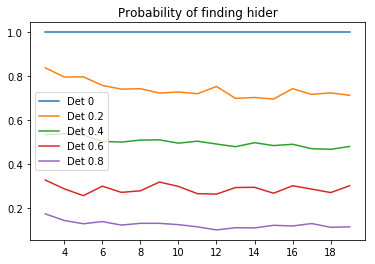

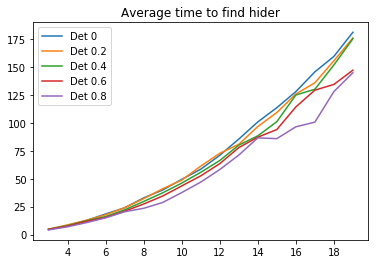

In [126]:
plt.plot(range(3, 20), data4['Deterministic_0.0']['success'],label = 'Det 0')
plt.plot(range(3, 20), data4['Deterministic_0.2']['success'],label = 'Det 0.2')
plt.plot(range(3, 20), data4['Deterministic_0.4']['success'],label = 'Det 0.4')
plt.plot(range(3, 20), data4['Deterministic_0.6000000000000001']['success'],label = 'Det 0.6')
plt.plot(range(3, 20), data4['Deterministic_0.8']['success'],label = 'Det 0.8')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data4['Deterministic_0.0']['time'],label = 'Det 0')
plt.plot(range(3, 20), data4['Deterministic_0.2']['time'],label = 'Det 0.2')
plt.plot(range(3, 20), data4['Deterministic_0.4']['time'],label = 'Det 0.4')
plt.plot(range(3, 20), data4['Deterministic_0.6000000000000001']['time'],label = 'Det 0.6')
plt.plot(range(3, 20), data4['Deterministic_0.8']['time'],label = 'Det 0.8')#plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

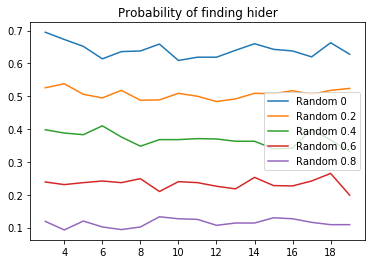

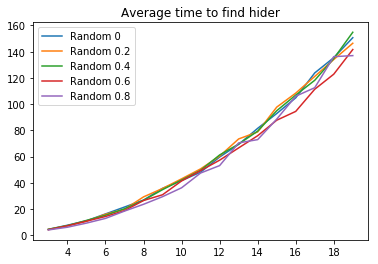

In [128]:
plt.plot(range(3, 20), data4['Random_0.0']['success'],label = 'Random 0')
plt.plot(range(3, 20), data4['Random_0.2']['success'],label = 'Random 0.2')
plt.plot(range(3, 20), data4['Random_0.4']['success'],label = 'Random 0.4')
plt.plot(range(3, 20), data4['Random_0.6000000000000001']['success'],label = 'Random 0.6')
plt.plot(range(3, 20), data4['Random_0.8']['success'],label = 'Random 0.8')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data4['Random_0.0']['time'],label = 'Random 0')
plt.plot(range(3, 20), data4['Random_0.2']['time'],label = 'Random 0.2')
plt.plot(range(3, 20), data4['Random_0.4']['time'],label = 'Random 0.4')
plt.plot(range(3, 20), data4['Random_0.6000000000000001']['time'],label = 'Random 0.6')
plt.plot(range(3, 20), data4['Random_0.8']['time'],label = 'Random 0.8')
#plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

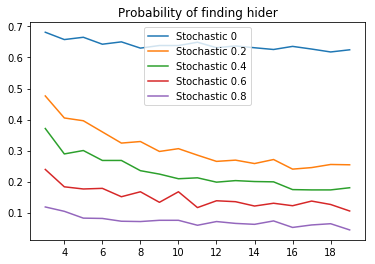

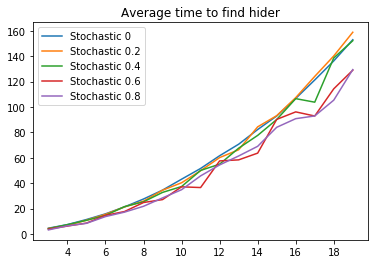

In [129]:
plt.plot(range(3, 20), data4['Markov Chain_0']['success'],label = 'Stochastic 0')
plt.plot(range(3, 20), data4['Markov Chain_0.2']['success'],label = 'Stochastic 0.2')
plt.plot(range(3, 20), data4['Markov Chain_0.4']['success'],label = 'Stochastic 0.4')
plt.plot(range(3, 20), data4['Markov Chain_0.6']['success'],label = 'Stochastic 0.6')
plt.plot(range(3, 20), data4['Markov Chain_0.8']['success'],label = 'Stochastic 0.8')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data4['Markov Chain_0']['time'],label = 'Stochastic 0')
plt.plot(range(3, 20), data4['Markov Chain_0.2']['time'],label = 'Stochastic 0.2')
plt.plot(range(3, 20), data4['Markov Chain_0.4']['time'],label = 'Stochastic 0.4')
plt.plot(range(3, 20), data4['Markov Chain_0.6']['time'],label = 'Stochastic 0.6')
plt.plot(range(3, 20), data4['Markov Chain_0.8']['time'],label = 'Stochastic 0.8')
#plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

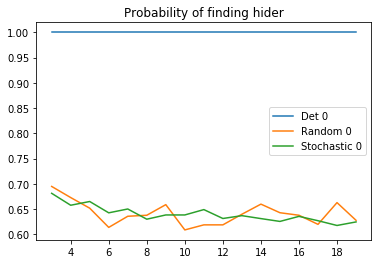

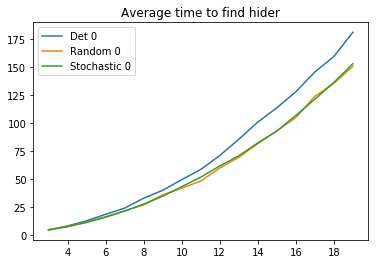

In [130]:
plt.plot(range(3, 20), data4['Deterministic_0.0']['success'],label = 'Det 0')
plt.plot(range(3, 20), data4['Random_0.0']['success'],label = 'Random 0')
plt.plot(range(3, 20), data4['Markov Chain_0']['success'],label = 'Stochastic 0')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

plt.plot(range(3, 20), data4['Deterministic_0.0']['time'],label = 'Det 0')
plt.plot(range(3, 20), data4['Random_0.0']['time'],label = 'Random 0')
plt.plot(range(3, 20), data4['Markov Chain_0']['time'],label = 'Stochastic 0')
plt.title('Average time to find hider')
plt.legend()
plt.show()

# Mobile hider, p escape = 1

In [134]:
time,success=stoc_ambush(0, 1, True, 0.5)
data5 = {'Markov Chain_0':{'time': time,
                        'success': success}}

data5

{'Markov Chain_0': {'time': array([  4.36881559,   7.63436123,  11.21035599,  15.86340641,
          21.08737864,  26.72504092,  34.53017945,  42.57741935,
          50.82026144,  59.54030875,  73.2546875 ,  84.58813559,
          98.58614865, 112.96278317, 119.3814262 , 135.25363489,
         157.2715655 ]),
  'success': array([0.667, 0.681, 0.618, 0.593, 0.618, 0.611, 0.613, 0.62 , 0.612,
         0.583, 0.64 , 0.59 , 0.592, 0.618, 0.603, 0.619, 0.626])}}

In [135]:
ambush = np.arange(0.1,1.1,0.1)

for p in ambush:
    t,s=stoc_ambush(p, 1, True, 0.5)
    print(p)
    data5[(f'Markov Chain_{p}')] = {'time': t,
                        'success': s}

data5

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


{'Markov Chain_0': {'time': array([  4.36881559,   7.63436123,  11.21035599,  15.86340641,
          21.08737864,  26.72504092,  34.53017945,  42.57741935,
          50.82026144,  59.54030875,  73.2546875 ,  84.58813559,
          98.58614865, 112.96278317, 119.3814262 , 135.25363489,
         157.2715655 ]),
  'success': array([0.667, 0.681, 0.618, 0.593, 0.618, 0.611, 0.613, 0.62 , 0.612,
         0.583, 0.64 , 0.59 , 0.592, 0.618, 0.603, 0.619, 0.626])},
 'Markov Chain_0.1': {'time': array([  4.43668831,   7.21717172,  11.96509599,  17.05756579,
          22.18487395,  27.10824742,  34.90378007,  42.34434783,
          51.89855072,  60.62040134,  69.32072072,  83.36234458,
          93.89022298, 110.7386172 , 120.77328647, 139.03602058,
         156.32179931]),
  'success': array([0.616, 0.594, 0.573, 0.608, 0.595, 0.582, 0.582, 0.575, 0.552,
         0.598, 0.555, 0.563, 0.583, 0.593, 0.569, 0.583, 0.578])},
 'Markov Chain_0.2': {'time': array([  4.40504202,   7.25945946,  10.74363

In [136]:
ambush = np.arange(0,1.1,0.1)

for p in ambush:
    t,s=det_ambush(p, 1, True, 0.5)
    print(p)
    data5[(f'Deterministic_{p}')] = {'time': t,
                        'success': s}

data5

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


{'Markov Chain_0': {'time': array([  4.36881559,   7.63436123,  11.21035599,  15.86340641,
          21.08737864,  26.72504092,  34.53017945,  42.57741935,
          50.82026144,  59.54030875,  73.2546875 ,  84.58813559,
          98.58614865, 112.96278317, 119.3814262 , 135.25363489,
         157.2715655 ]),
  'success': array([0.667, 0.681, 0.618, 0.593, 0.618, 0.611, 0.613, 0.62 , 0.612,
         0.583, 0.64 , 0.59 , 0.592, 0.618, 0.603, 0.619, 0.626])},
 'Markov Chain_0.1': {'time': array([  4.43668831,   7.21717172,  11.96509599,  17.05756579,
          22.18487395,  27.10824742,  34.90378007,  42.34434783,
          51.89855072,  60.62040134,  69.32072072,  83.36234458,
          93.89022298, 110.7386172 , 120.77328647, 139.03602058,
         156.32179931]),
  'success': array([0.616, 0.594, 0.573, 0.608, 0.595, 0.582, 0.582, 0.575, 0.552,
         0.598, 0.555, 0.563, 0.583, 0.593, 0.569, 0.583, 0.578])},
 'Markov Chain_0.2': {'time': array([  4.40504202,   7.25945946,  10.74363

In [137]:
for p in ambush:
    t,s=rand_ambush(p, 1, True, 0.5)
    print(p)
    data5[(f'Random_{p}')] = {'time': t,
                        'success': s}

data5

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


{'Markov Chain_0': {'time': array([  4.36881559,   7.63436123,  11.21035599,  15.86340641,
          21.08737864,  26.72504092,  34.53017945,  42.57741935,
          50.82026144,  59.54030875,  73.2546875 ,  84.58813559,
          98.58614865, 112.96278317, 119.3814262 , 135.25363489,
         157.2715655 ]),
  'success': array([0.667, 0.681, 0.618, 0.593, 0.618, 0.611, 0.613, 0.62 , 0.612,
         0.583, 0.64 , 0.59 , 0.592, 0.618, 0.603, 0.619, 0.626])},
 'Markov Chain_0.1': {'time': array([  4.43668831,   7.21717172,  11.96509599,  17.05756579,
          22.18487395,  27.10824742,  34.90378007,  42.34434783,
          51.89855072,  60.62040134,  69.32072072,  83.36234458,
          93.89022298, 110.7386172 , 120.77328647, 139.03602058,
         156.32179931]),
  'success': array([0.616, 0.594, 0.573, 0.608, 0.595, 0.582, 0.582, 0.575, 0.552,
         0.598, 0.555, 0.563, 0.583, 0.593, 0.569, 0.583, 0.578])},
 'Markov Chain_0.2': {'time': array([  4.40504202,   7.25945946,  10.74363

In [138]:
data5

{'Markov Chain_0': {'time': array([  4.36881559,   7.63436123,  11.21035599,  15.86340641,
          21.08737864,  26.72504092,  34.53017945,  42.57741935,
          50.82026144,  59.54030875,  73.2546875 ,  84.58813559,
          98.58614865, 112.96278317, 119.3814262 , 135.25363489,
         157.2715655 ]),
  'success': array([0.667, 0.681, 0.618, 0.593, 0.618, 0.611, 0.613, 0.62 , 0.612,
         0.583, 0.64 , 0.59 , 0.592, 0.618, 0.603, 0.619, 0.626])},
 'Markov Chain_0.1': {'time': array([  4.43668831,   7.21717172,  11.96509599,  17.05756579,
          22.18487395,  27.10824742,  34.90378007,  42.34434783,
          51.89855072,  60.62040134,  69.32072072,  83.36234458,
          93.89022298, 110.7386172 , 120.77328647, 139.03602058,
         156.32179931]),
  'success': array([0.616, 0.594, 0.573, 0.608, 0.595, 0.582, 0.582, 0.575, 0.552,
         0.598, 0.555, 0.563, 0.583, 0.593, 0.569, 0.583, 0.578])},
 'Markov Chain_0.2': {'time': array([  4.40504202,   7.25945946,  10.74363

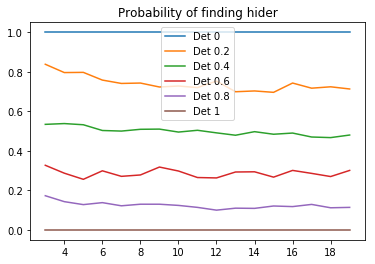

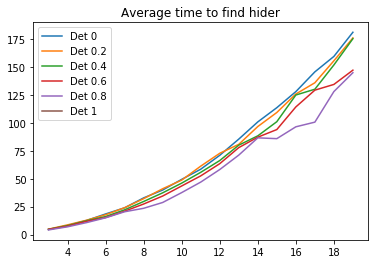

In [139]:
plt.plot(range(3, 20), data4['Deterministic_0.0']['success'],label = 'Det 0')
plt.plot(range(3, 20), data4['Deterministic_0.2']['success'],label = 'Det 0.2')
plt.plot(range(3, 20), data4['Deterministic_0.4']['success'],label = 'Det 0.4')
plt.plot(range(3, 20), data4['Deterministic_0.6000000000000001']['success'],label = 'Det 0.6')
plt.plot(range(3, 20), data4['Deterministic_0.8']['success'],label = 'Det 0.8')
plt.plot(range(3, 20), data4['Deterministic_1.0']['success'],label = 'Det 1')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data4['Deterministic_0.0']['time'],label = 'Det 0')
plt.plot(range(3, 20), data4['Deterministic_0.2']['time'],label = 'Det 0.2')
plt.plot(range(3, 20), data4['Deterministic_0.4']['time'],label = 'Det 0.4')
plt.plot(range(3, 20), data4['Deterministic_0.6000000000000001']['time'],label = 'Det 0.6')
plt.plot(range(3, 20), data4['Deterministic_0.8']['time'],label = 'Det 0.8')#plt.plot(range(3,20),t,label="T")
plt.plot(range(3, 20), data4['Deterministic_1.0']['time'],label = 'Det 1')
plt.title('Average time to find hider')
plt.legend()
plt.show()

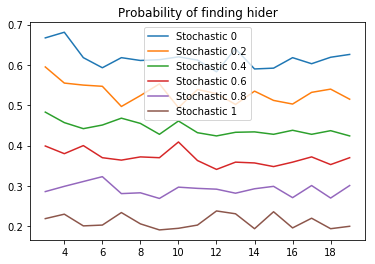

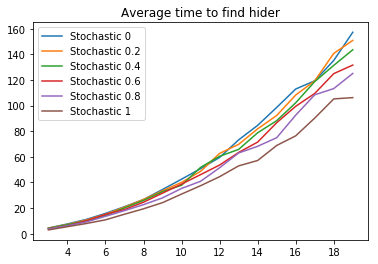

In [140]:
plt.plot(range(3, 20), data5['Markov Chain_0']['success'],label = 'Stochastic 0')
plt.plot(range(3, 20), data5['Markov Chain_0.2']['success'],label = 'Stochastic 0.2')
plt.plot(range(3, 20), data5['Markov Chain_0.4']['success'],label = 'Stochastic 0.4')
plt.plot(range(3, 20), data5['Markov Chain_0.6']['success'],label = 'Stochastic 0.6')
plt.plot(range(3, 20), data5['Markov Chain_0.8']['success'],label = 'Stochastic 0.8')
plt.plot(range(3, 20), data5['Markov Chain_1.0']['success'],label = 'Stochastic 1')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data5['Markov Chain_0']['time'],label = 'Stochastic 0')
plt.plot(range(3, 20), data5['Markov Chain_0.2']['time'],label = 'Stochastic 0.2')
plt.plot(range(3, 20), data5['Markov Chain_0.4']['time'],label = 'Stochastic 0.4')
plt.plot(range(3, 20), data5['Markov Chain_0.6']['time'],label = 'Stochastic 0.6')
plt.plot(range(3, 20), data5['Markov Chain_0.8']['time'],label = 'Stochastic 0.8')
plt.plot(range(3, 20), data5['Markov Chain_1.0']['time'],label = 'Stochastic 1')
#plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

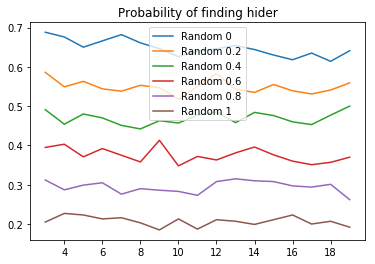

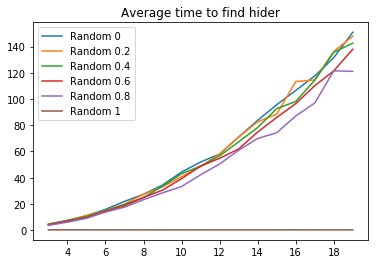

In [141]:
plt.plot(range(3, 20), data5['Random_0.0']['success'],label = 'Random 0')
plt.plot(range(3, 20), data5['Random_0.2']['success'],label = 'Random 0.2')
plt.plot(range(3, 20), data5['Random_0.4']['success'],label = 'Random 0.4')
plt.plot(range(3, 20), data5['Random_0.6000000000000001']['success'],label = 'Random 0.6')
plt.plot(range(3, 20), data5['Random_0.8']['success'],label = 'Random 0.8')
plt.plot(range(3, 20), data5['Random_1.0']['success'],label = 'Random 1')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

t = np.arange(3,20)**2
plt.plot(range(3, 20), data5['Random_0.0']['time'],label = 'Random 0')
plt.plot(range(3, 20), data5['Random_0.2']['time'],label = 'Random 0.2')
plt.plot(range(3, 20), data5['Random_0.4']['time'],label = 'Random 0.4')
plt.plot(range(3, 20), data5['Random_0.6000000000000001']['time'],label = 'Random 0.6')
plt.plot(range(3, 20), data5['Random_0.8']['time'],label = 'Random 0.8')
plt.plot(range(3, 20), data5['Random_1.0']['success'],label = 'Random 1')
#plt.plot(range(3,20),t,label="T")
plt.title('Average time to find hider')
plt.legend()
plt.show()

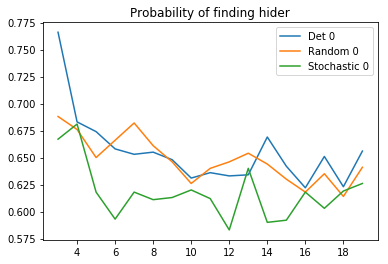

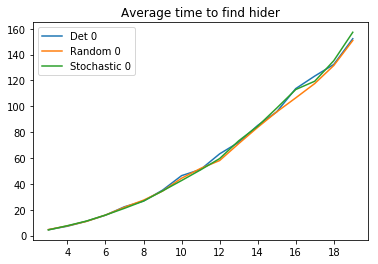

In [142]:
plt.plot(range(3, 20), data5['Deterministic_0.0']['success'],label = 'Det 0')
plt.plot(range(3, 20), data5['Random_0.0']['success'],label = 'Random 0')
plt.plot(range(3, 20), data5['Markov Chain_0']['success'],label = 'Stochastic 0')
plt.title('Probability of finding hider')
plt.legend()
plt.show()

plt.plot(range(3, 20), data5['Deterministic_0.0']['time'],label = 'Det 0')
plt.plot(range(3, 20), data5['Random_0.0']['time'],label = 'Random 0')
plt.plot(range(3, 20), data5['Markov Chain_0']['time'],label = 'Stochastic 0')
plt.title('Average time to find hider')
plt.legend()
plt.show()